**2. Custom Linear Regression**

In [ ]:
class CustomLR:

  def __init__(self):
    self.m = None
    self.c = None

  def fit(self, X_train, y_train):
    # Aim is to find m and b

    num = 0
    den = 0

    for i in range(0, len(X_train)):
      x = X_train[i] - X_train.mean()
      y = y_train[i] - y_train.mean()

      num += x*y
      den += x**2

    self.m = num/den
    self.c = y_train.mean() - (self.m * X_train.mean())


  def predict(self, X_test):
    return [self.m * X_test[i] + self.c for i in range(len(X_test)) ]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_Self/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

print(X)
print(y)

[6.89 5.12 7.82 7.42 6.94 7.89 6.73 6.75 6.09 8.31 5.32 6.61 8.94 6.93
 7.73 7.25 6.84 5.38 6.94 7.48 7.28 6.85 6.14 6.19 6.53 7.28 8.31 5.42
 5.94 7.15 7.36 8.1  6.96 6.35 7.34 6.87 5.99 5.9  8.62 7.43 9.38 6.89
 5.95 7.66 5.09 7.87 6.07 5.84 8.63 8.87 9.58 9.26 8.37 6.47 6.86 8.2
 5.84 6.6  6.92 7.56 5.61 5.48 6.34 9.16 7.36 7.6  5.11 6.51 7.56 7.3
 5.79 7.47 7.78 8.44 6.85 6.97 6.94 8.99 6.59 7.18 7.63 6.1  5.58 8.44
 4.26 4.79 7.61 8.09 4.73 6.42 7.11 6.22 7.9  6.79 5.83 6.63 7.11 5.98
 7.69 6.61 7.95 6.71 5.13 7.05 7.62 6.66 6.13 6.33 7.76 7.77 8.18 5.42
 8.58 6.94 5.84 8.35 9.04 7.12 7.4  7.39 5.23 6.5  5.12 5.1  6.06 7.33
 5.91 6.78 7.93 7.29 6.68 6.37 5.84 6.05 7.2  6.1  5.64 7.14 7.91 7.19
 7.91 6.76 6.93 4.85 6.17 5.84 6.07 5.66 7.57 8.28 6.3  6.12 7.37 7.94
 7.08 6.98 7.38 6.47 5.95 8.71 7.13 7.3  5.53 8.93 9.06 8.21 8.6  8.13
 8.65 9.31 6.22 8.01 6.93 6.75 7.32 7.04 6.29 7.09 8.15 7.14 6.19 8.22
 5.88 7.28 7.88 6.31 7.84 6.26 7.35 8.11 6.19 7.28 8.25 4.57 7.89 6.93
 5.89 7.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
lr = CustomLR()

lr.fit(X_train, y_train)
print(lr.m)
print(lr.c)

0.5579519734250721
-0.8961119222429152


Text(0, 0.5, 'package')

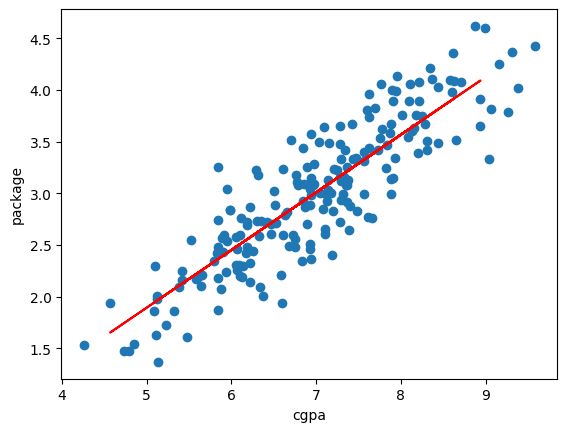

In [ ]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, lr.predict(X_test), color="red")
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
# Metrics

n = len(df.values)
print(n)
k = 1

def mean_absolute_error(y_test, y_pred):
  l = len(y_test)
  sum = 0
  for i in range(l):
    sum += np.abs(y_test[i] - y_pred[i])
  return sum / l

def mean_squared_error(y_test, y_pred):
  l = len(y_test)
  sum = 0
  for i in range(l):
    sum += (y_test[i] - y_pred[i]) ** 2
  return sum / l

mae = mean_absolute_error(y_test, lr.predict(X_test))
mse = mean_squared_error(y_test, lr.predict(X_test))
rmse = np.sqrt(mse)

print(mae, mse, rmse)

200
0.28847109318781733 0.1212923531349552 0.34827051717731605
